In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import homcloud.interface as hc
from scipy.spatial import ConvexHull
%matplotlib inline

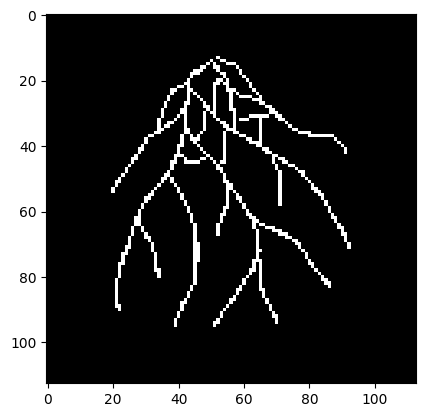

In [2]:
####Read the image
img = cv2.imread("Slide1.jpg", cv2.IMREAD_UNCHANGED)
ret, img_binary1 = cv2.threshold(img, 50, 255,cv2.THRESH_BINARY)
plt.imshow(img_binary1[:,:,0],cmap='gray')

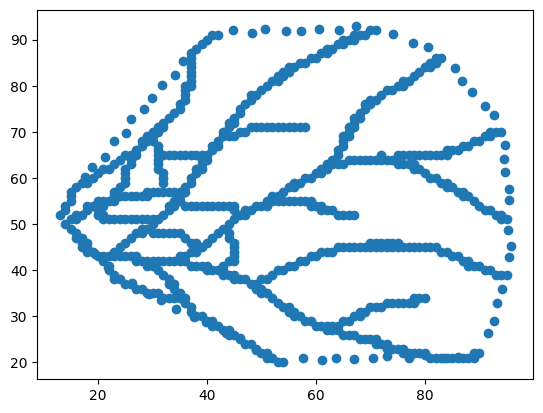

In [3]:
####Plot points on Convex Hull
img_binary=img_binary1[:,:,0]
I=np.nonzero(img_binary)
points=np.transpose(np.array([I[0],I[1]]))
hull = ConvexHull(points)
points = hull.points
hull_points = points[hull.vertices]
hp = np.vstack((hull_points, hull_points[0]))
convhull=[]
dist=3###the interval of plots on Convex Hull
for i in range (0,len(hp)-1):
    np.random.seed(23)
    X=hp[i]
    Y=hp[i+1]
    XYdist=math.sqrt(np.sum(np.square(X-Y)))
    number=int(XYdist/dist)
    for j in range (1,number):
        noise=np.random.rand(2)
        Z=((j*Y+(number-j)*X)/number)+noise
        Z=Z.tolist()
        convhull.append(Z)
convhull=np.array(convhull)
allpoints=np.vstack((points,convhull))
plt.scatter(allpoints[:,0], allpoints[:,1])
plt.show()

In [4]:
####Calculate persistent homology with the original image plus points on Convex Hull
hc.PDList.from_alpha_filtration(allpoints,save_to="pointcloud.pdgm",save_boundary_map=True,no_squared=True)
pdlist = hc.PDList("pointcloud.pdgm")
pd1 = pdlist.dth_diagram(1)
pairs=pd1.pairs()
listpairs=[[pairs[i].birth,pairs[i].death] for i in range (0,len(pairs))]
convhullpairs = list(map(list, set(map(tuple, listpairs))))

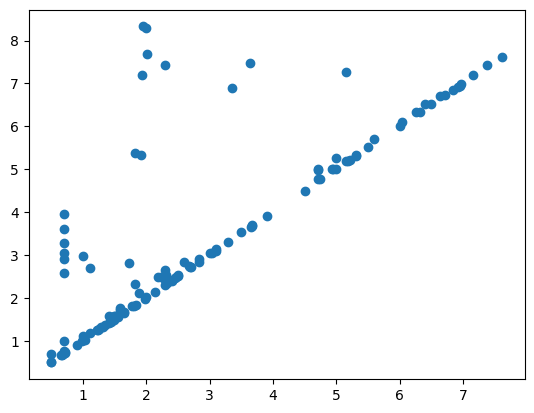

In [5]:
####Plot persistence diagram (original image + Convex Hull)
convhullpairsarr=np.array(convhullpairs)
plt.scatter(convhullpairsarr[:,0],convhullpairsarr[:,1])
plt.show()

In [6]:
####Calculate persistent homology with the original image alone
hc.PDList.from_alpha_filtration(points,save_to="pointcloud2.pdgm",save_boundary_map=True,no_squared=True)
pdlist2 = hc.PDList("pointcloud2.pdgm")
pd21 = pdlist2.dth_diagram(1)
pairs2=pd21.pairs()
listpairs2=[[pairs2[i].birth,pairs2[i].death] for i in range (0,len(pairs2))]
originalpairs = list(map(list, set(map(tuple, listpairs2))))

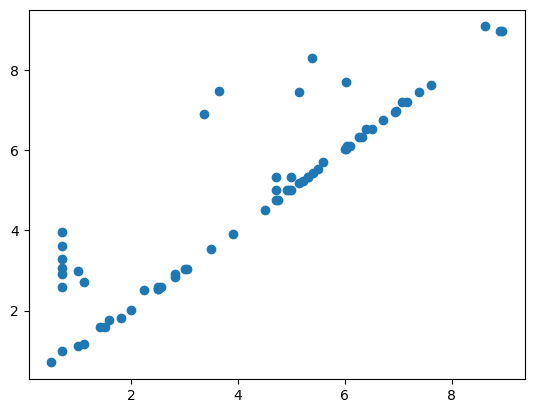

In [7]:
####Plot persistence diagram (original image)
originalpairsarr=np.array(originalpairs)
plt.scatter(originalpairsarr[:,0],originalpairsarr[:,1])
plt.show()

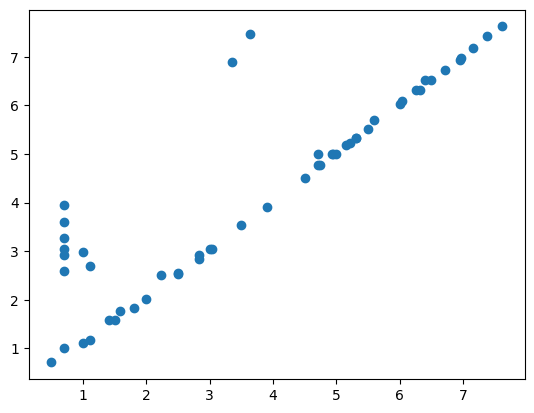

In [8]:
####Intersection of two diagrams (internal structure)
intersect = [x for x in convhullpairs if x in originalpairs]
intersectarr=np.array(intersect)
plt.scatter(intersectarr[:,0],intersectarr[:,1])
plt.show()

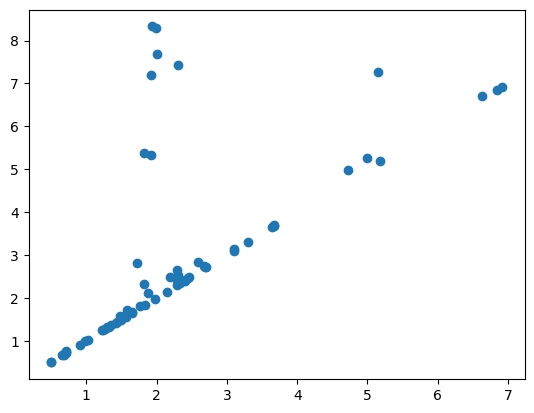

In [9]:
####Difference of two diagrams (external structure)
onlybranch=[x for x in convhullpairs if x not in originalpairs]
onlybrancharr=np.array(onlybranch)
plt.scatter(onlybrancharr[:,0],onlybrancharr[:,1])
plt.show()

In [10]:
####Choose long barcodes
internallong=[x for x in intersect if x[1]-x[0]>0.5]####choose barcodes with length greater than this number
externallong=[x for x in onlybranch if x[1]-x[0]>0.5]

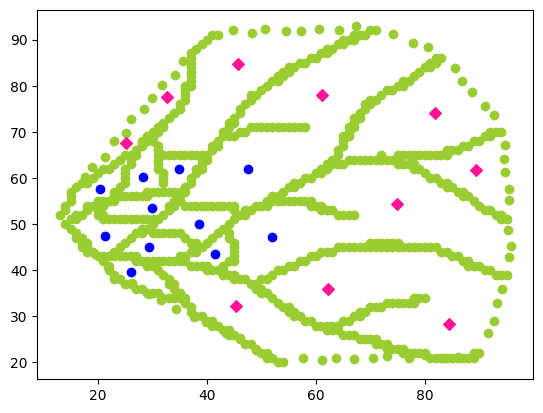

External(red): 10 Internal(blue): 11


In [11]:
####Plot the detected internal/external structures
externalnumber=0
internalnumber=0
plt.scatter(allpoints[:,0], allpoints[:,1],color='yellowgreen')
for i in range (0,len(pairs)):
    if [pairs[i].birth,pairs[i].death] in externallong:
        P=pairs[i].death_position
        x=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[1][1]-P[2][1])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[2][1]-P[0][1])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[0][1]-P[1][1]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        y=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[2][0]-P[1][0])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[0][0]-P[2][0])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[1][0]-P[0][0]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        plt.scatter(x,y,color='deeppink',marker='D')
        externalnumber=externalnumber+1
for i in range (0,len(pairs2)):
    if [pairs2[i].birth,pairs2[i].death] in internallong:
        P=pairs2[i].death_position
        x=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[1][1]-P[2][1])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[2][1]-P[0][1])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[0][1]-P[1][1]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        y=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[2][0]-P[1][0])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[0][0]-P[2][0])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[1][0]-P[0][0]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
        plt.scatter(x,y,color='blue',marker='o')
        internalnumber=internalnumber+1
plt.show()       
print("External(red):",externalnumber,"Internal(blue):",internalnumber)